In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%config InlineBackend.figure_format = 'retina'

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('telecom_churn.csv')

In [ ]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


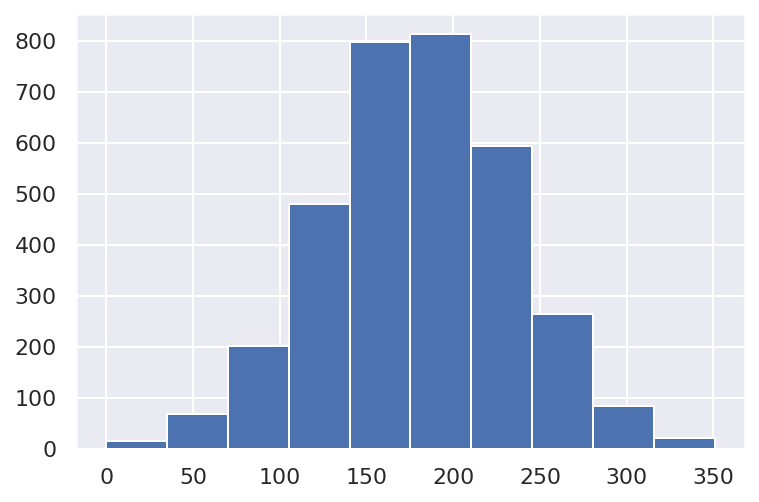

In [ ]:
df['Total day minutes'].hist()

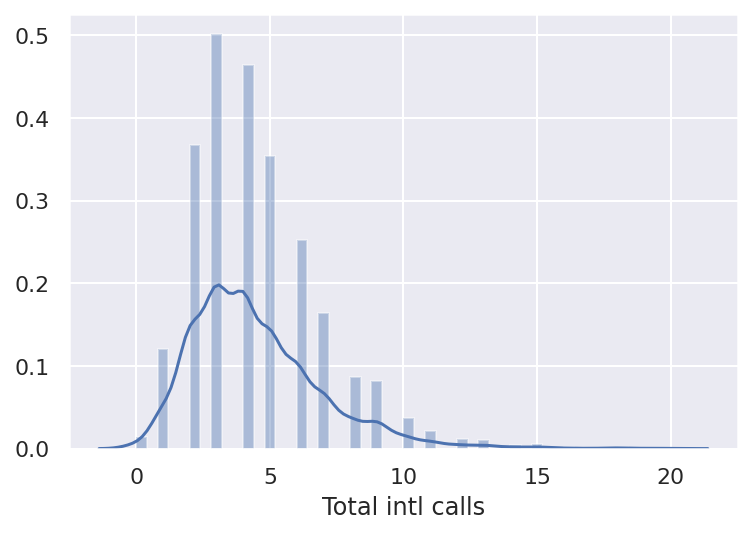

In [ ]:
sns.distplot(df['Total intl calls']);

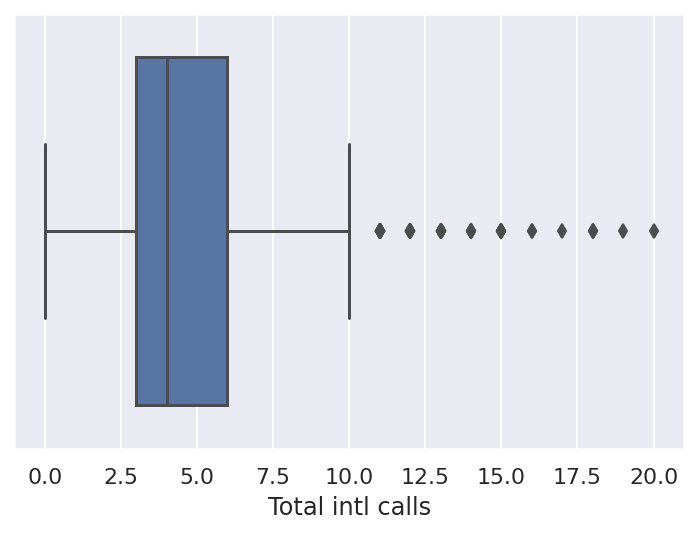

In [ ]:
sns.boxplot(x='Total intl calls', data=df)

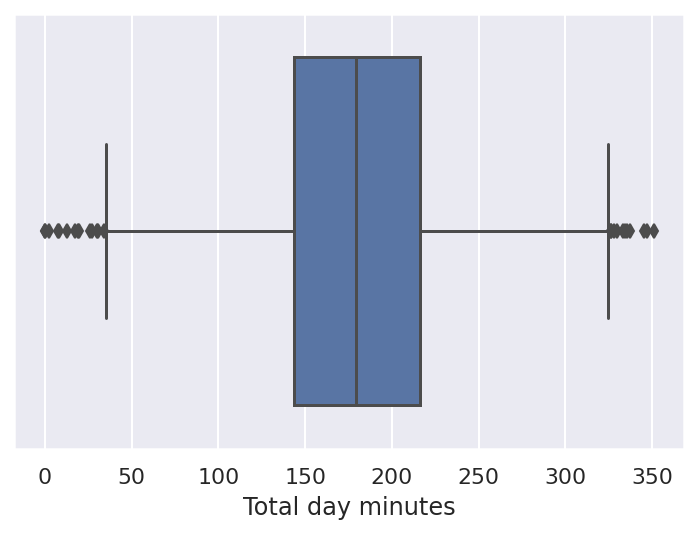

In [ ]:
sns.boxplot(x='Total day minutes', data=df)

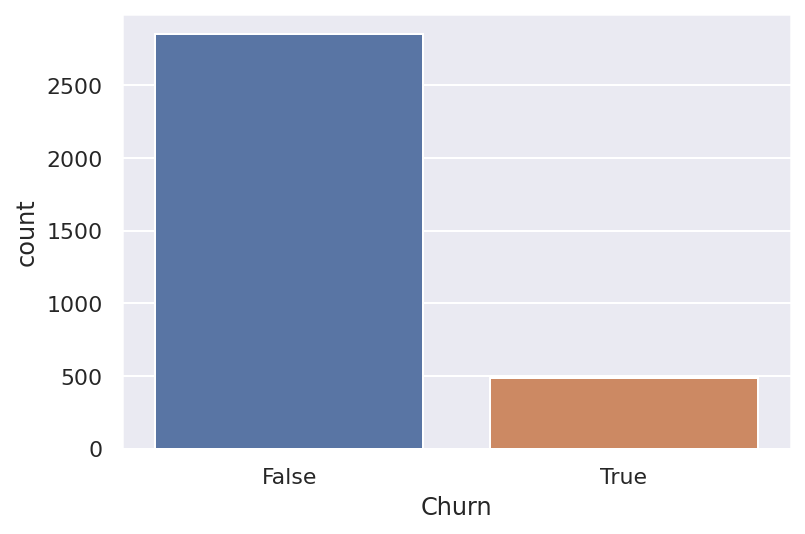

In [ ]:
sns.countplot(x='Churn', data=df);

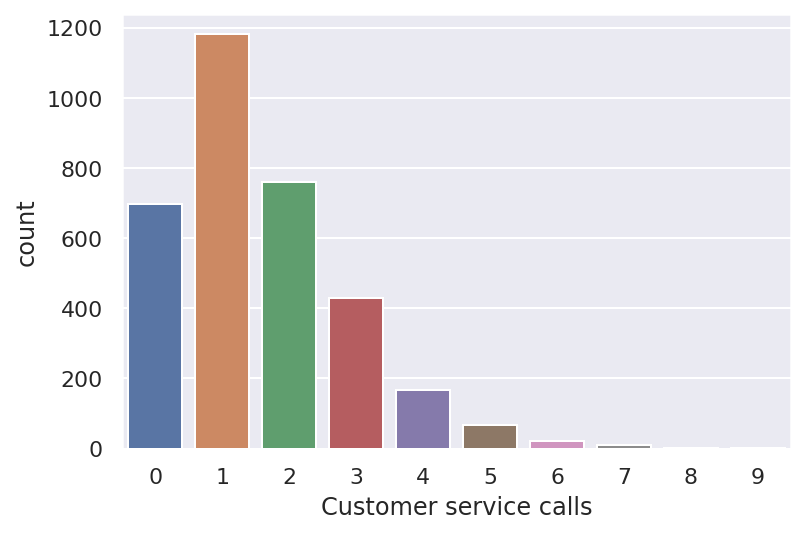

In [ ]:
sns.countplot(x='Customer service calls', data=df);

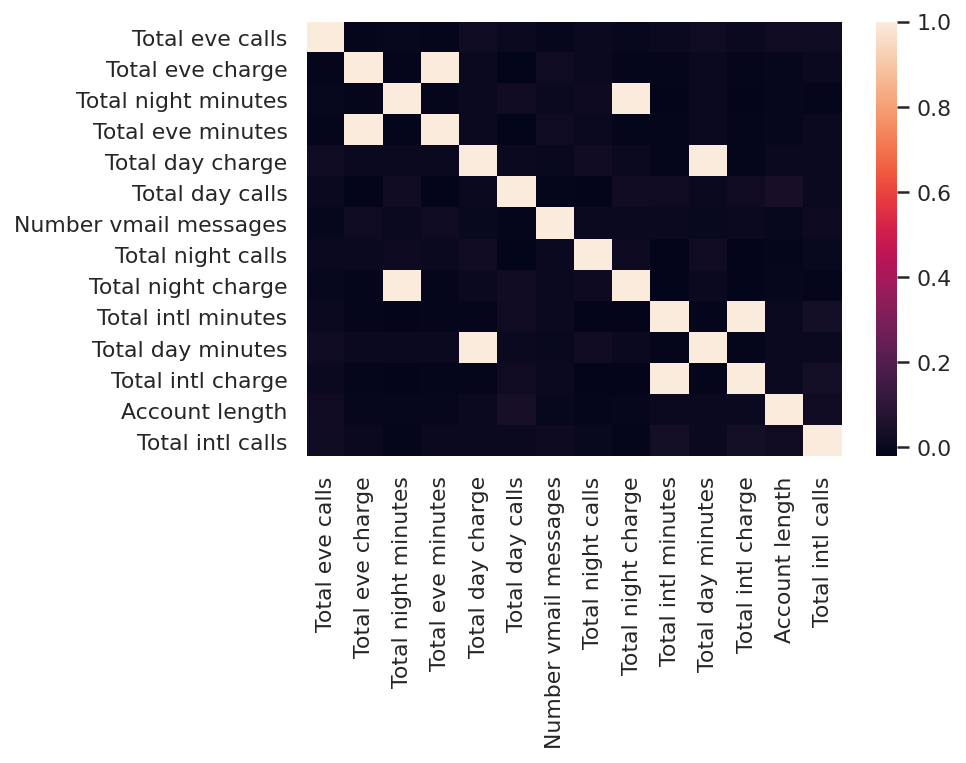

In [ ]:
# Drop non-numerical variables
numerical = list(set(df.columns) - set(['State', 'International plan', 'Voice mail plan', 'Area code', 'Churn', 'Customer service calls']))
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);

In [ ]:
numerical = list(set(numerical) -  set(['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']))

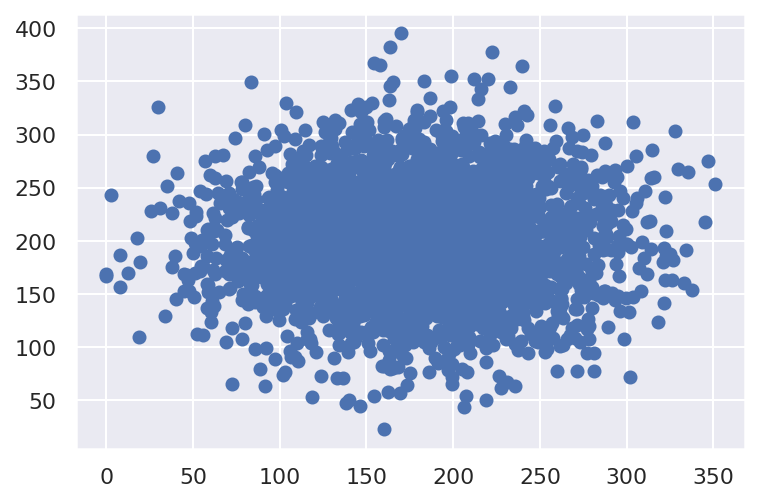

In [ ]:
plt.scatter(df['Total day minutes'], df['Total night minutes'])

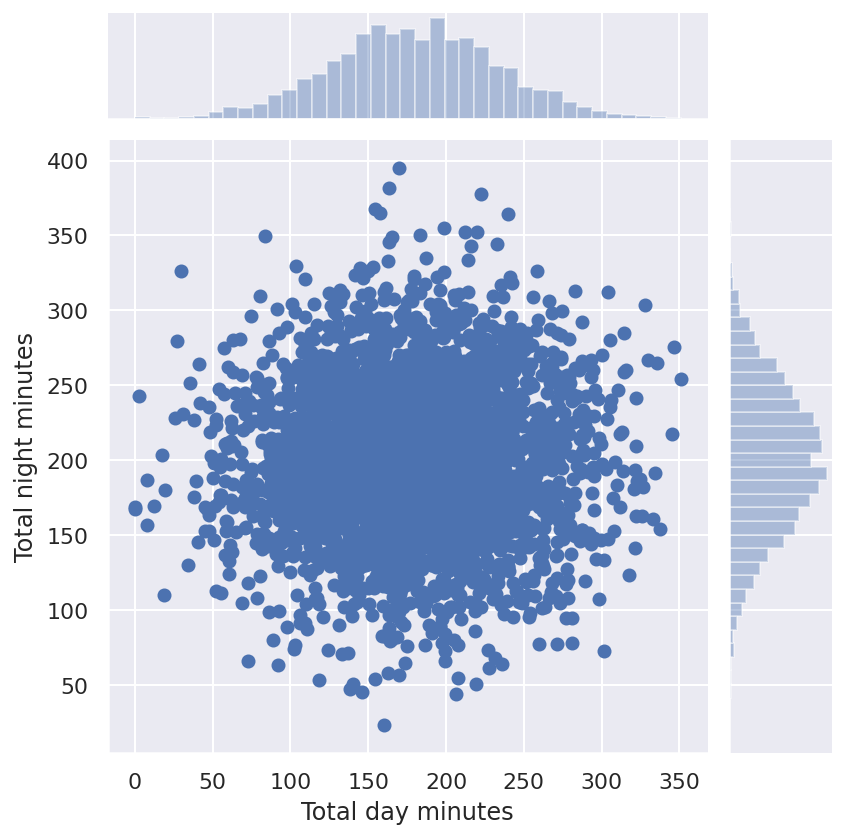

In [ ]:
sns.jointplot(x='Total day minutes', y='Total night minutes', data=df, kind='scatter');

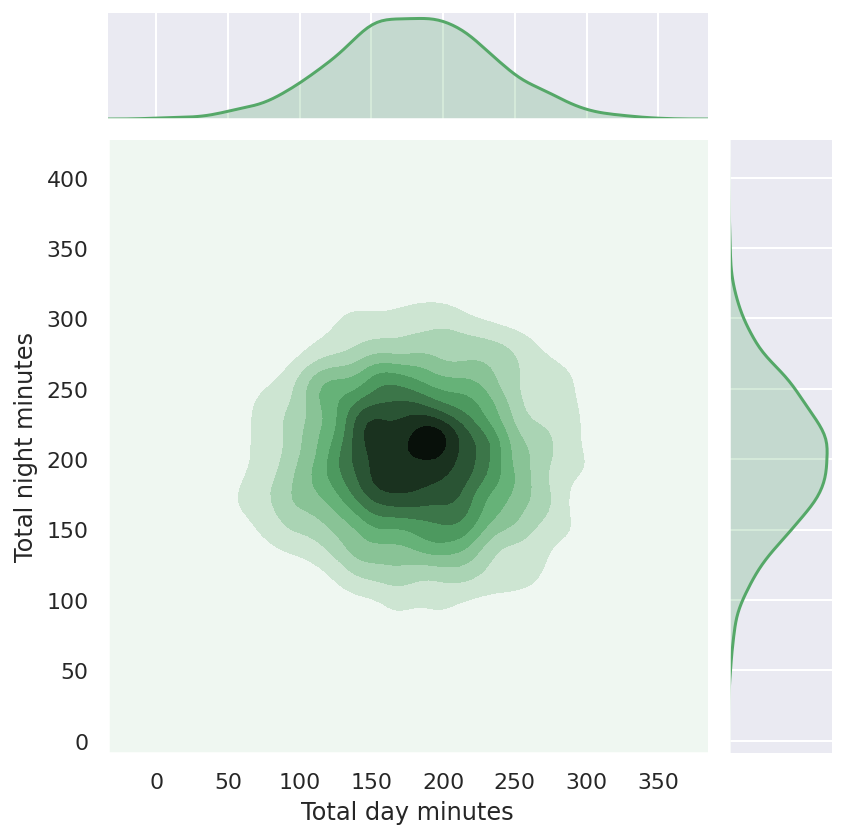

In [ ]:
sns.jointplot('Total day minutes', 'Total night minutes', data=df,kind="kde", color="g");

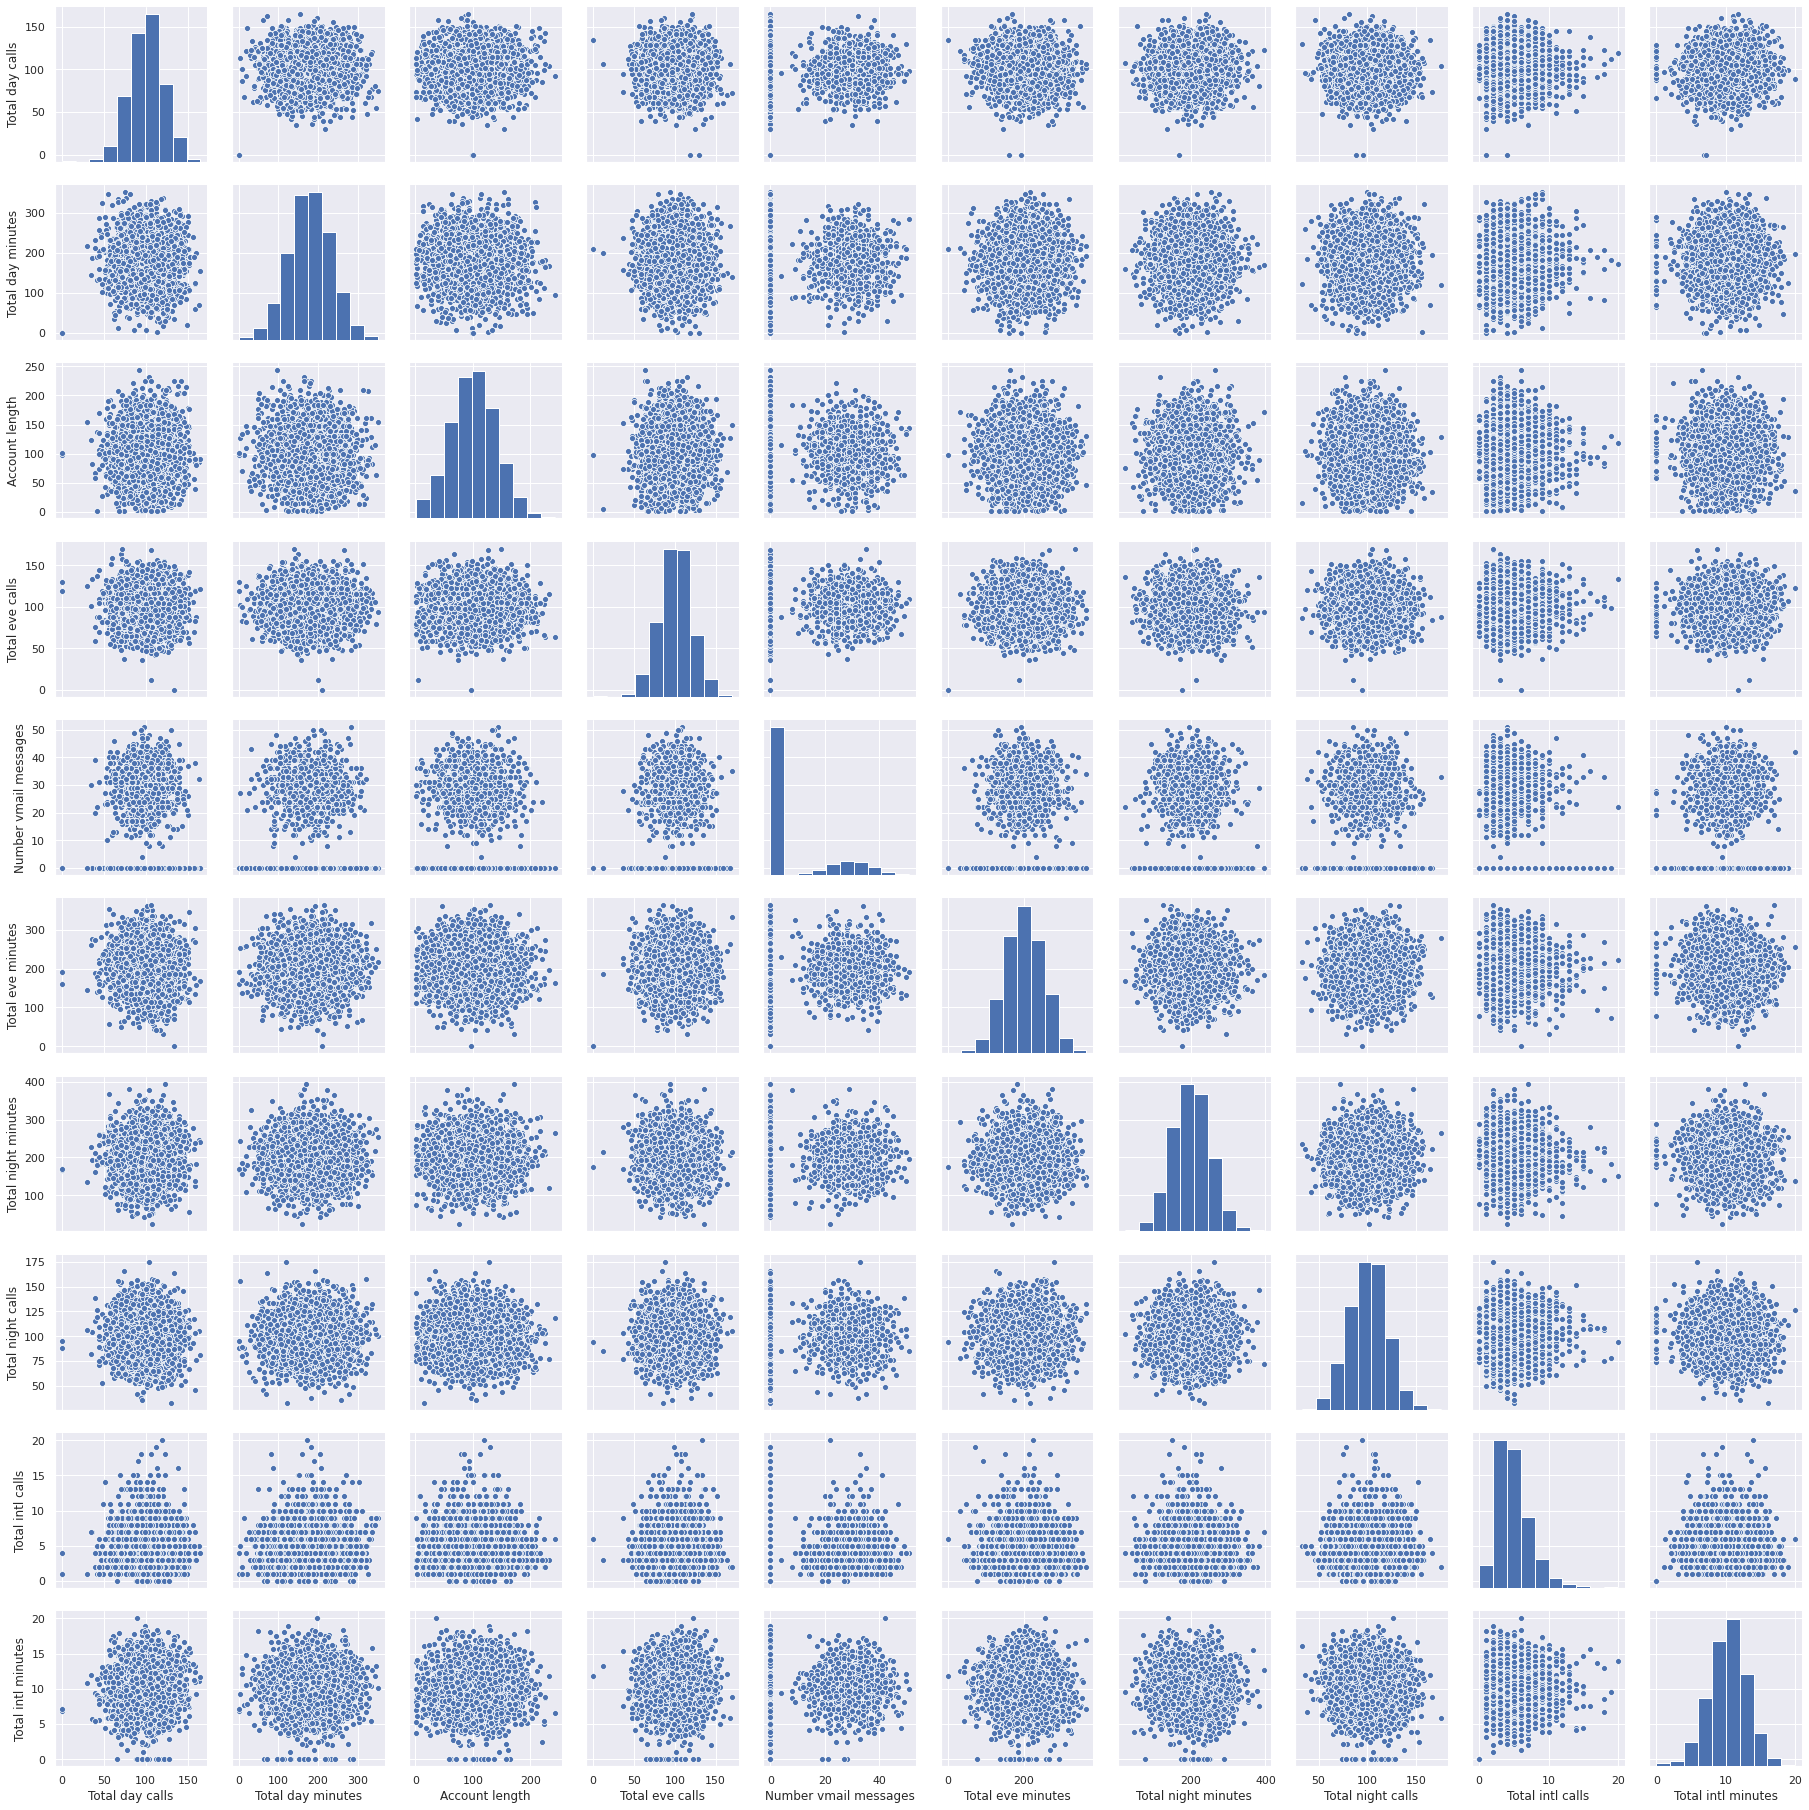

In [ ]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical]);

In [ ]:
%config InlineBackend.figure_format = 'retina'

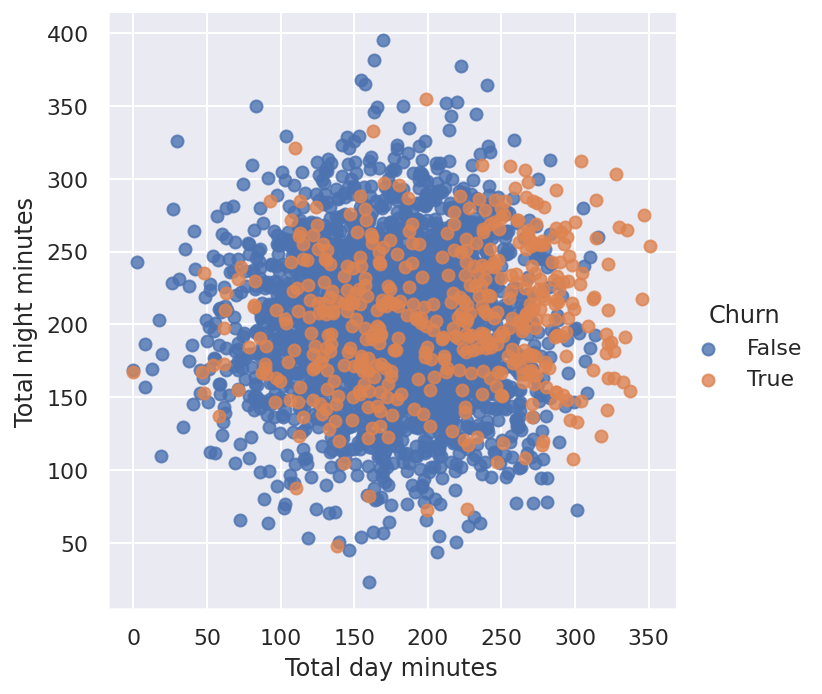

In [ ]:
sns.lmplot('Total day minutes', 'Total night minutes', data=df, hue='Churn', fit_reg=False)

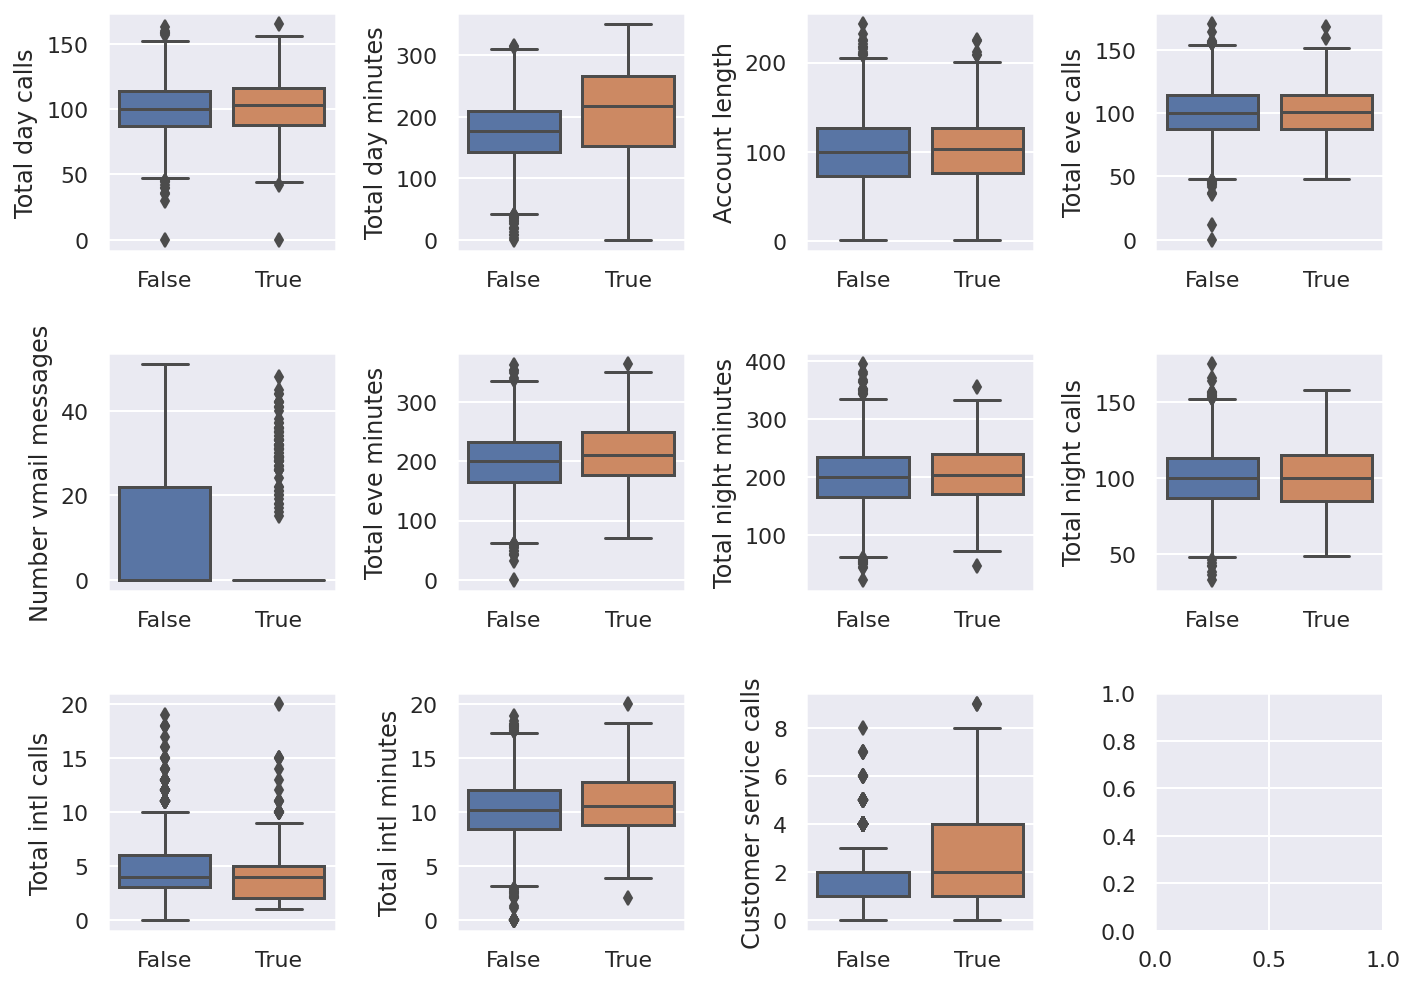

In [ ]:
numerical.append('Customer service calls')

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x='Churn', y=feat, data=df, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout()

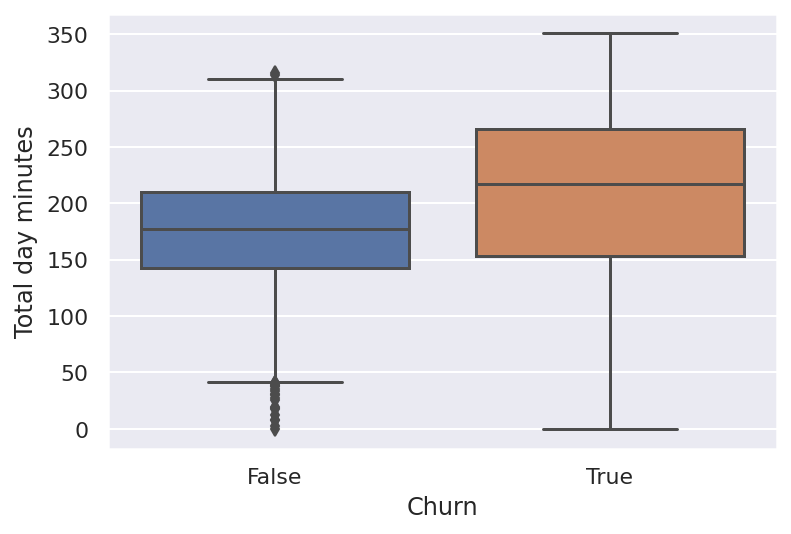

In [ ]:
sns.boxplot(x='Churn', y='Total day minutes', data=df);

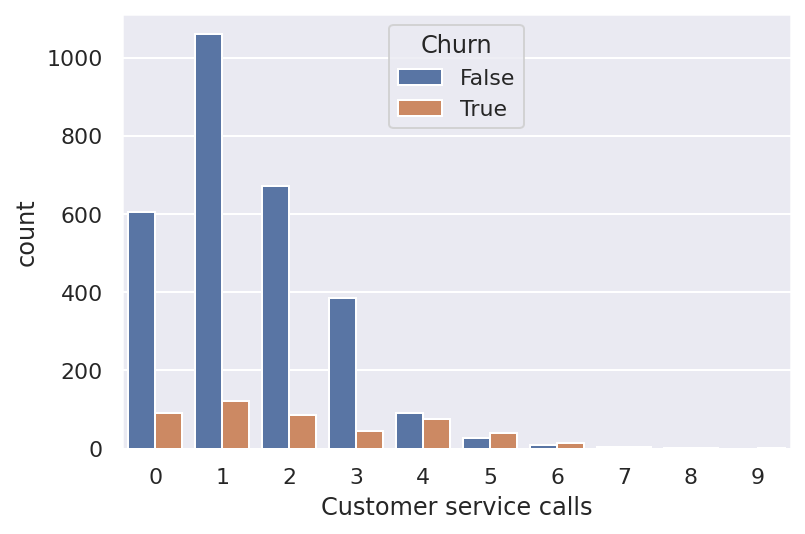

In [ ]:
sns.countplot(x='Customer service calls', hue='Churn', data=df)

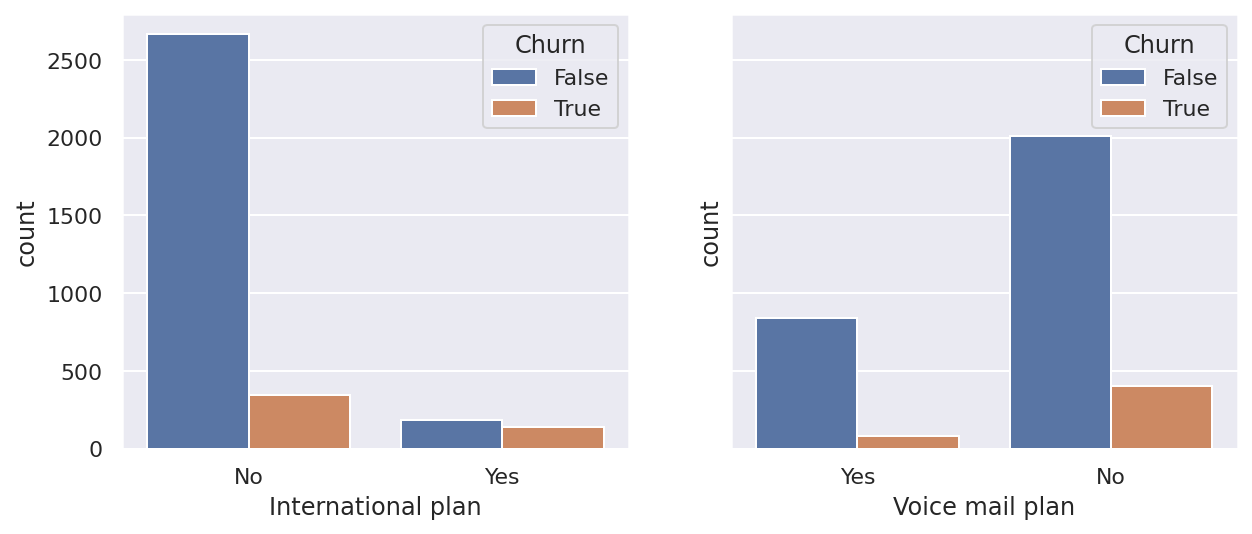

In [ ]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.countplot(x='International plan', hue='Churn', data=df, ax=axes[0]);
sns.countplot(x='Voice mail plan', hue='Churn', data=df, ax=axes[1]);

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df.drop(['Churn', 'State'], axis=1)
X['International plan'] = X['International plan'].map({'Yes': 1, 'No': 0})
X['Voice mail plan'] = X['Voice mail plan'].map({'Yes': 1, 'No': 0})

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

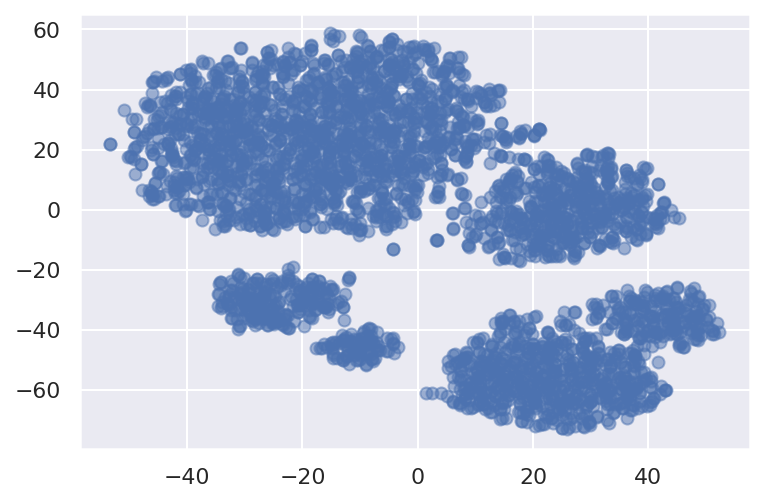

In [ ]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=.5);

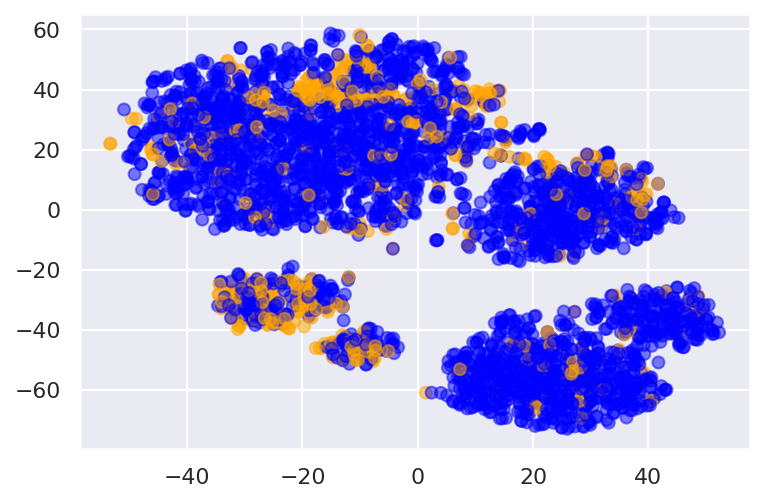

In [ ]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], c=df['Churn'].map({False: 'blue', True: 'orange'}), alpha=.5);